# HW2 - Gradient Descent Algoritm Implementation
## 2022104346 정지헌

Import required modules

In [1]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from typing import Callable

Defining the cost function and implementing Gradient Descent algorithm

$g(w_1, w_2) = w_1^2 + w_2^2 + 2 \sin(1.5 (w_1 + w_2))^2 +2$

In [2]:
class CostFunction(Callable):
    def __call__(self, w: np.ndarray):
        return w[0] ** 2 + w[1] ** 2 + 2 * np.sin((1.5 * (w[0] + w[1])) ** 2) + 2
        # return (w[0]-1)*(w[0]-1) + (w[1]-2)*(w[1]-2)
    
class GradientDescent:
    def __init__(self, g: Callable[[np.ndarray], np.ndarray], init_w: np.ndarray):
        self.g = g
        self.w = np.copy(init_w)

        self.g_history = []
        self.w_history = []

        self.g_grad = grad(self.g)

    def run(self, learning_rate: float, num_iterations: int):
        self.g_history.append(self.g(self.w))
        self.w_history.append(np.copy(self.w))

        for i in range(num_iterations):
            evaluated_grad = self.g_grad(self.w)
            
            self.w -= learning_rate * evaluated_grad

            self.g_history.append(self.g(self.w))
            self.w_history.append(np.copy(self.w))

    def plot_result(self):
        _, axes = plt.subplots(2, 1, figsize = (18, 36))
        plt.Axes.set_title(axes[0], "Cost History")
        plt.Axes.set_xlabel(axes[0], "steps")
        plt.Axes.set_ylabel(axes[0], "g(w)")
        plt.Axes.plot(axes[0], np.arange(len(self.g_history)), self.g_history)

        plt.Axes.set_title(axes[1], "W Values History")
        plt.Axes.set_xlabel(axes[1], "$w_1$")
        plt.Axes.set_ylabel(axes[1], "$w_2$")
        # plt.Axes.scatter(axes[1], [w[0] for w in self.w_history], [w[1] for w in self.w_history], c = 1 - np.array(self.g_history) / (np.max(self.g_history) - np.min(self.g_history)), cmap = "rainbow")
        plt.Axes.scatter(axes[1], [w[0][0] for w in self.w_history], [w[1][0] for w in self.w_history], c = np.linspace(0, 1, len(self.w_history)), cmap = "rainbow")


Creating instances

In [3]:
target_function = CostFunction()
init_w = np.random.randn(2, 1)
optimizer = GradientDescent(target_function, init_w)

Running optimizer and plotting results

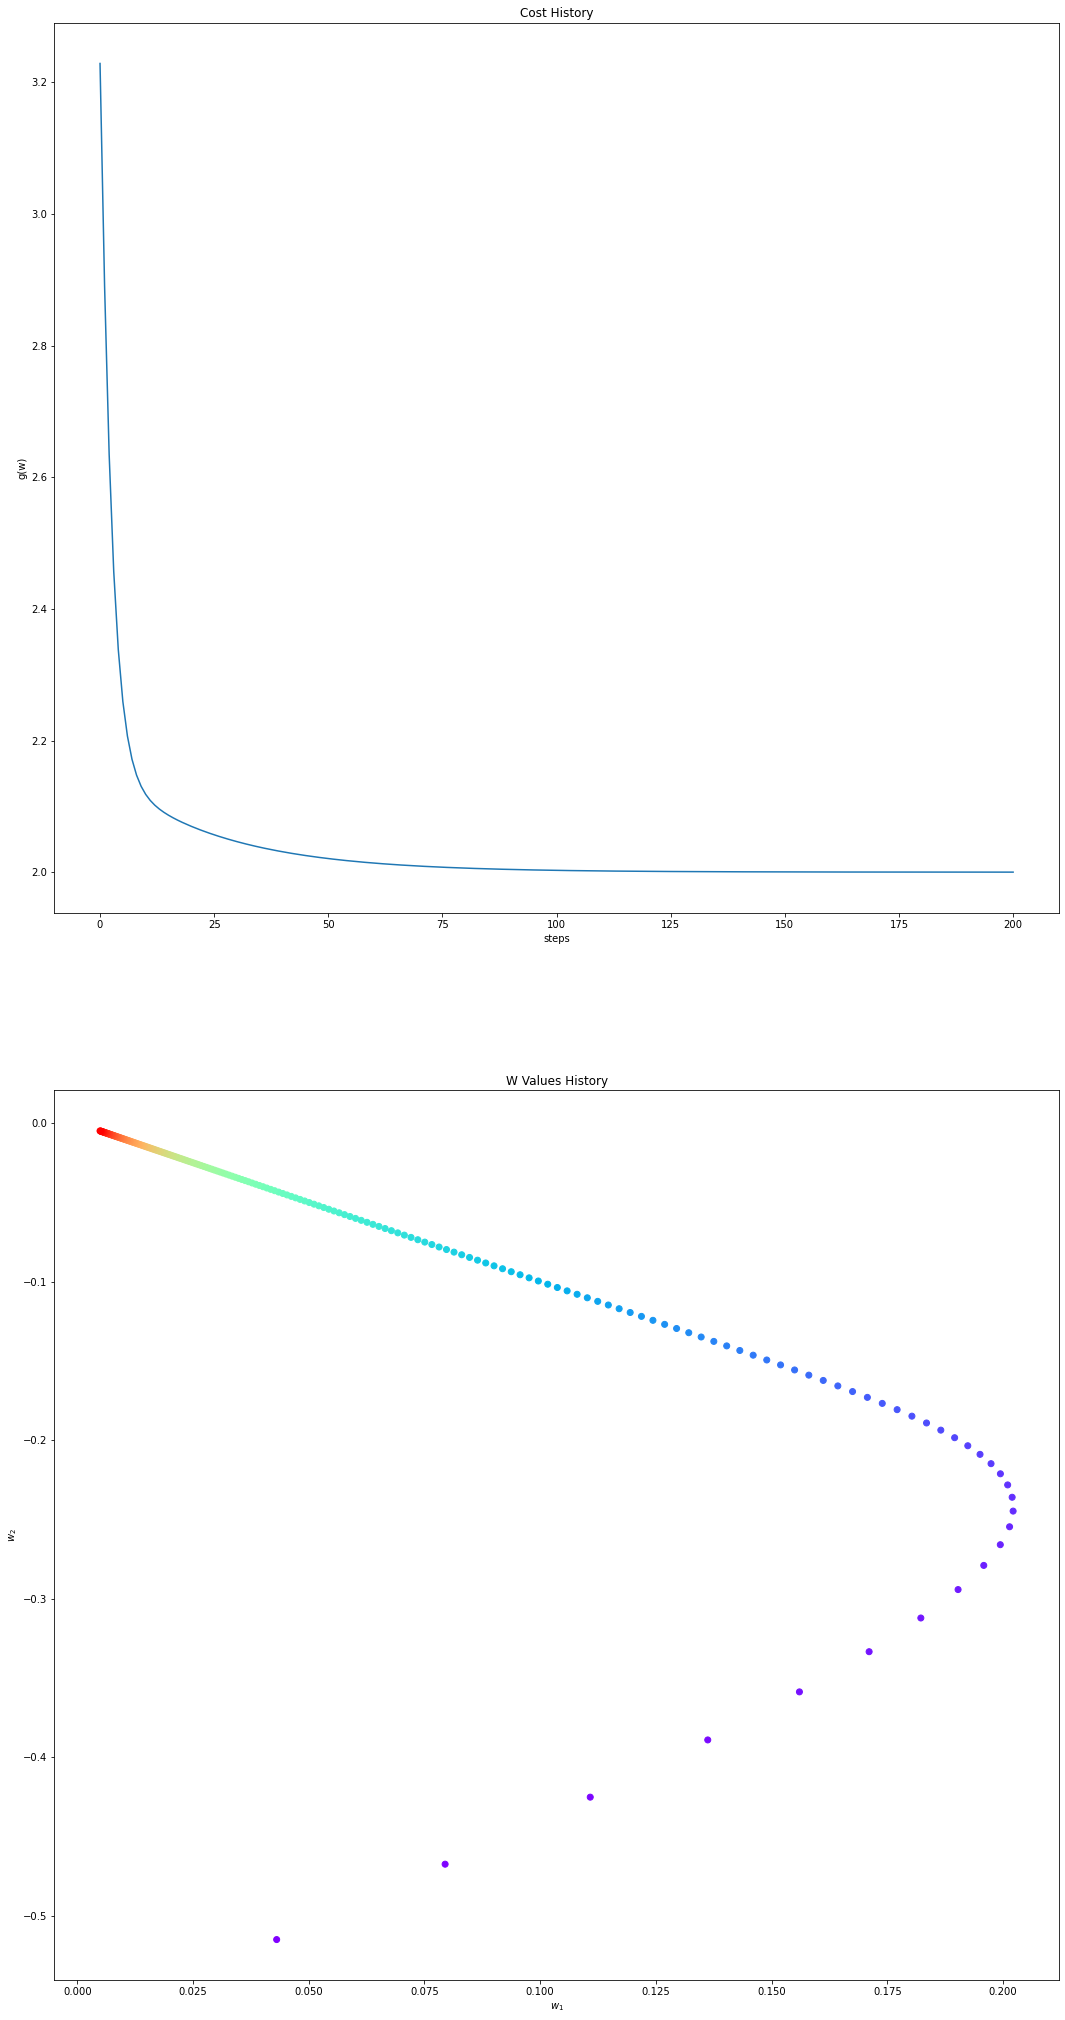

In [4]:
optimizer.run(1e-2, 200)
optimizer.plot_result()